# SOSNet: Second Order Similarity Regularization for Local Descriptor Learning

## Runing `SOSNet` with `openCV` for image matching

Below we show how to use the `openCV` pipeline to match two images using `SOSNet`.

In [26]:
import torch 
import sosnet_model
import os
%matplotlib notebook
from matplotlib import pyplot as plt
import cv2
import tfeat_utils
import numpy as np
import cv2
torch.no_grad()

# Init the 32x32 version of SOSNet 
sosnet32 = sosnet_model.SOSNet32x32()
# net_name = 'notredame'
net_name = 'hpatches_a'
sosnet32.load_state_dict(torch.load(os.path.join('sosnet-weights',"sosnet-32x32-"+net_name+".pth"), map_location=torch.device('cpu')))
sosnet32.cpu().eval();

matches: 1296, good: 202


<IPython.core.display.Javascript object>


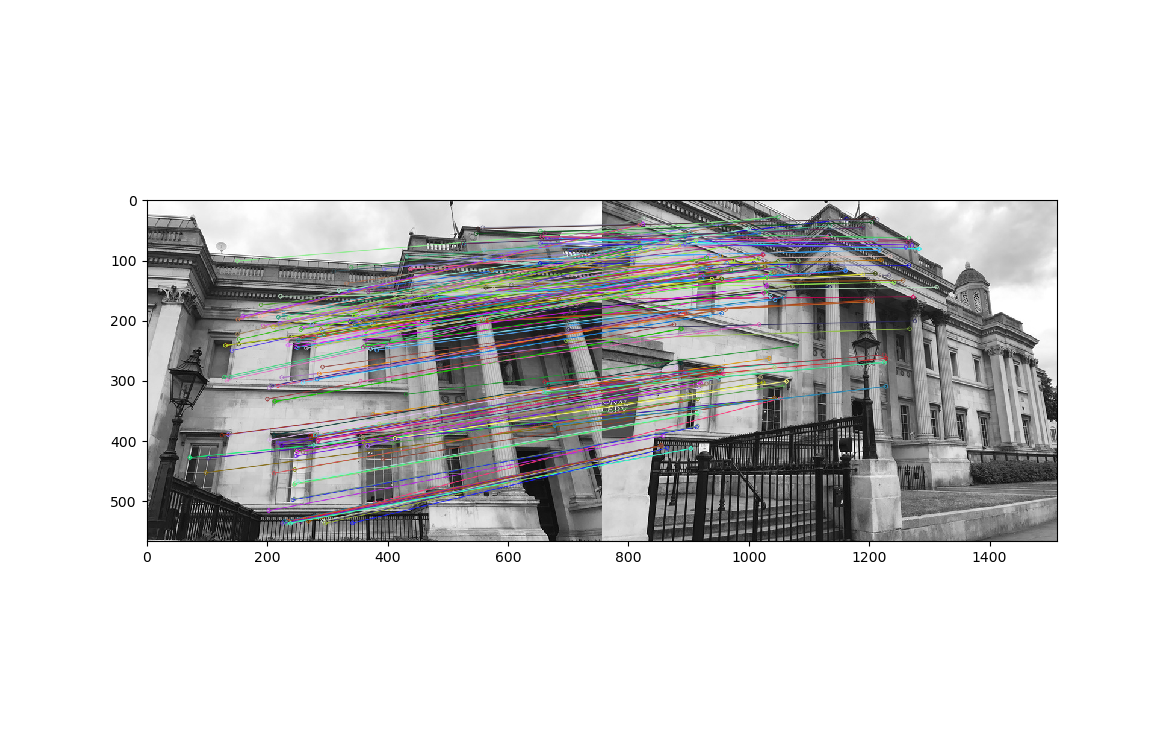

(<Figure size 640x480 with 1 Axes>,
 None)

In [28]:
# Load the images and detect BRISK keypoints using openCV
img1 = cv2.imread('imgs/img1.jpg', 0)
img2 = cv2.imread('imgs/img2.jpg', 0)

# detector = cv2.BRISK_create(100)
# detector = cv2.FastFeatureDetector_create(50)
detector = cv2.AKAZE_create()
# detector = cv2.GFTTDetector_create()
kp1 = detector.detect(img1, None)
kp2 = detector.detect(img2, None)
# kp1,desc1 = detector.detectAndCompute(img1, None)
# kp2,desc2 = detector.detectAndCompute(img2, None)

# for i in range(50, 100):
#     print(kp1[i].size)

# We use the tfeat_utils methods that rectify patches around openCV keypoints and 
desc_tfeat1 = tfeat_utils.describe_opencv(sosnet32, img1, kp1, patch_size=32, mag_factor=3, use_gpu=False)
desc_tfeat2 = tfeat_utils.describe_opencv(sosnet32, img2, kp2, patch_size=32, mag_factor=3, use_gpu=False)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(desc_tfeat1,desc_tfeat2, k=2)
# matches = bf.knnMatch(desc1,desc2, k=2)

# Apply SIFT's ratio test, notice that 0.8 may not be the best ratio for SOSNet
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])
        
img_matches_32 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, 0, flags=2)
print(f"matches: {len(matches)}, good: {len(good)}")
cv2.imwrite("sosnet32-matches.png", img_matches_32)
plt.figure(0), plt.imshow(img_matches_32), plt.show()